In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import defaultdict
# importing the dataset

df=pd.read_csv('/content/drive/MyDrive/0.MKCE/Datasets/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
#cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]

In [ ]:
for i in range(0,1000):
  review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)


In [ ]:
# create the bag of word model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)


In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


1.Supervised learning 

1.1.Linear regression using OLS

In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [ ]:
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state=10)
# print the shape of 'x_train'
print("X_train ",xtrain.shape)

# print the shape of 'x_test'
print("X_test ",xtest.shape)

# print the shape of 'y_train'
print("y_train ",ytrain.shape)

# print the shape of 'y_test'
print("y_test ",ytest.shape)

X_train  (800, 1500)
X_test  (200, 1500)
y_train  (800,)
y_test  (200,)


In [ ]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(xtrain, ytrain)


LinearRegression()

In [ ]:
# predict the values
y_pred_OLS = OLS_model.predict(xtest)

In [ ]:
type(OLS_model)

sklearn.linear_model._base.LinearRegression

In [ ]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(xtrain,ytrain)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(ytest, y_pred_OLS))
print('R-square:',r_squared_OLS)
print("RMSE_OLS:",rmse_OLS)

R-square: 0.9621391331067168
RMSE_OLS: 9997671987392.387


1.2.Linear regression using SGD

In [ ]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


SGDRegressor(alpha=0.1, loss='squared_loss')

In [ ]:
# predict the values
y_pred_SGD  = SGD_model.predict(xtest)

In [ ]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(xtrain,ytrain)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(ytest, y_pred_SGD))
print('R-square_SGD:',r_squared_SGD)
print("RMSE_SGD:",rmse_SGD)

R-square_SGD: 0.1497592843922807
RMSE_SGD: 0.478600887675806


1.3.Logistic Regression 


In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


In [ ]:
# Splitting the dataset into the Training set and Test set

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [ ]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


In [ ]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(xtest)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [ ]:
accuracy_score(ytest,y_pred)

0.728

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[89, 28],
       [40, 93]])

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       117
           1       0.77      0.70      0.73       133

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250



1.4.Decision Tree

In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(xtrain,ytrain)

xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
ypred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

0.665

In [ ]:
confusion_matrix(ytest,ypred)

array([[72, 25],
       [42, 61]])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68        97
           1       0.71      0.59      0.65       103

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200



1.5.Random Forest

In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# scalling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)


In [ ]:
# fitting Random Forest Classification to the training set

from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier(n_estimators= 20, criterion= 'entropy', random_state= 0)

classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
# predicting the test set results

ypred= classifier.predict(xtest)


In [ ]:
# measuring the accuracy of model

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(ytest,ypred)

0.71

In [ ]:
confusion_matrix(ytest,ypred)

array([[86, 11],
       [47, 56]])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75        97
           1       0.84      0.54      0.66       103

    accuracy                           0.71       200
   macro avg       0.74      0.72      0.70       200
weighted avg       0.74      0.71      0.70       200



In [ ]:
# import roc_curve to compute reciver operating characteristics

from sklearn.metrics import roc_curve

# import roc_auc_score to calcutate area under roc curve

from sklearn.metrics import roc_auc_score


In [ ]:
# visualizing the roc-auc curve

y_proba=classifier.predict_proba(xtest)

#we take the predicted values of class 1

y_predicted = y_proba[:,1]


In [ ]:
# we cheak to see if the right values have been considered from the predicted values

print(y_predicted)

[0.15       0.         0.25       0.275      0.55       0.35
 1.         0.05       0.         0.85       0.7        0.95
 0.85       0.6        0.95       1.         0.50416667 0.
 0.0125     0.6        0.         0.7        0.95       0.15
 0.3        0.8        0.2        1.         1.         0.4
 0.175      0.125      0.2625     0.0625     0.9        0.25
 0.25833333 0.025      0.3        1.         0.75       0.4625
 0.025      0.03809524 0.         0.2        0.85       1.
 0.8        0.25       0.425      0.55       0.2125     0.9
 0.35       0.3        0.025      0.025      0.075      0.325
 0.0625     0.0125     0.25416667 0.5125     0.43333333 0.
 0.2625     0.4        0.075      0.4375     0.95       1.
 0.225      0.2        0.05       0.3        0.03055556 0.75
 0.         0.5125     0.3625     0.66666667 0.65       0.15
 0.75       0.55       0.5        0.55       1.         0.175
 0.31666667 0.6125     0.0125     0.0625     0.         0.1625
 0.425      0.1        0.308

In [ ]:
# using roc_curve() to generate fpr & tpr values

fpr,tpr,threshold = roc_curve(ytest,y_predicted)


In [ ]:
# passing the fpr & tpr values to auc() to calculate the area under curve

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print("Area under the curve for first model:",roc_auc)


Area under the curve for first model: 0.7754479031128017


Text(0, 0.5, 'True positive Rate (Sensitivity)')

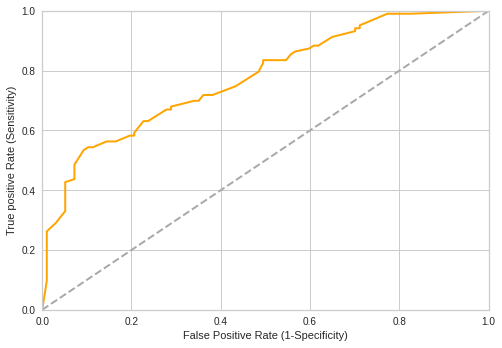

In [ ]:
#plotting the roc curve

import matplotlib.pyplot as plt


plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve (area under the curve =%0.2f'%roc_auc)

plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True positive Rate (Sensitivity)')


1.6.KNN

In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
#K-NN classifier
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
#predicting the test set results
y_pred=classifier.predict(xtest)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,ypred)

0.71

In [ ]:
#making confusion matrix
confusion_matrix(ytest,y_pred)

array([[75, 22],
       [46, 57]])

In [ ]:
#classification report
z=classification_report(ytest,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        97
           1       0.72      0.55      0.63       103

    accuracy                           0.66       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.67      0.66      0.66       200



1.7.SVM

In [ ]:
x=cv.fit_transform(corpus).toarray()
#y=df.iloc[:,1].values
y=df['Liked'].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# SVM Classifier
#fiting svm to the training set
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',probability= True, random_state=0)
classifier.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.728

In [ ]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 79,  38],
       [ 30, 103]])

In [ ]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       117
           1       0.73      0.77      0.75       133

    accuracy                           0.73       250
   macro avg       0.73      0.72      0.73       250
weighted avg       0.73      0.73      0.73       250



2. Unsupervised Learning 

2.1. K-Means clustering

In [ ]:
#Unsupervised learning 
# Importing Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [ ]:
#K-Means Clustering
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

In [ ]:
#fit the k-means model
km.fit_predict(x)

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Calculate Silhoutte Score
score = silhouette_score(x, km.labels_, metric='euclidean')

In [ ]:
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.030


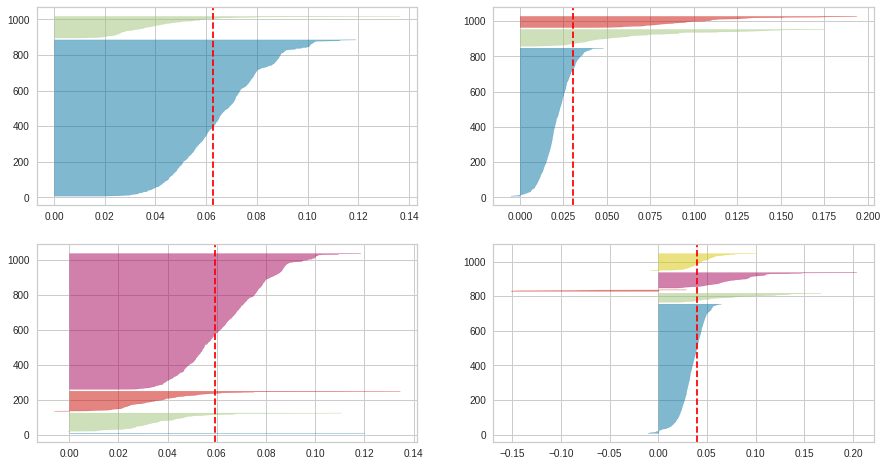

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)